# MNIST Probability Experiments 1
** October 2017 **

** Andrew Riberio @ [AndrewRib.com](http://www.andrewrib.com) **

Note: Remember, when working with well documented python objects, one may always use the help function to show the documentation by calling *help(obj)*.

The MNIST dataset is the staple of classic computer vision research. It consists of 55,000 28 X 28 greyscale images of numerical digits [0,9]. The images are unrolled into a column vector of size 28 X 28 = 784, so the dimension of the data matrix is 55000 X 784. 

In this notebook we will explore the MNIST dataset in a probabalistic way.

Resources
* https://www.tensorflow.org/get_started/mnist/beginners

## Libraries & MNIST Data

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Working with the MNIST Dataset
In this section we will explore how to use the MNIST dataset represented by a Dataset object definined in the tensorflow library at tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet. 

We will be dealing with two sets of data. 

1. The *unrolled* image data matrix.

2. The labels for each image.

In [16]:
print("Shape of the image data matrix: {0}".format(mnist.train.images.shape))
print("Shape of the label data: {0}".format(mnist.train.labels.shape))

Shape of the image data matrix: (55000, 784)
Shape of the label data: (55000,)


Let's see an example of column of the data matrix and associated label: 

In [416]:
exampleIndex = 3
exImage      = mnist.train.images[exampleIndex ,:]
exImageLabel = mnist.train.labels[exampleIndex]
exImage 

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

The training image[4] has the label of: 6
Column vector of training image[4]: (784,)
We now reshape the column vector of training image[4] to 28 X 28 for plotting and get: 


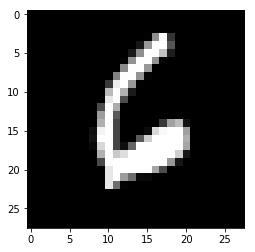

In [420]:
print("The training image[{0}] has the label of: {1}".format(exampleIndex+1,exImageLabel))
print("Column vector of training image[{0}]: {1}".format(exampleIndex+1,firstImage.shape))
print("We now reshape the column vector of training image[{0}] to 28 X 28 for plotting and get: ".format(exampleIndex+1))
plt.imshow(exImage.reshape(28,28), cmap='gray')
plt.show()

Now that we have access to the traning data and labels, let's explore some statistical questions. 

### Question 1: What is the average value of each pixel?

Let's start by getting the average value for the top left pixel. Due to knowing the data, I'm predicting a zero average due to no image having anything drawn in that pixel region.

In [63]:
sum(mnist.train.images[:,0])/mnist.train.images[:,0].shape[0]

0.0

Ding ding, I was correct! Let's now do the same for every pixel. We could itterate over all the 784 rows and use the formula above, but there's a better way of doing this with linear algebra. We first calculate the sums of the rows to get a 784 x 1 vector of row sums. 

In [110]:
rowSums =  np.dot(mnist.train.images.T, np.ones((55000,1)))

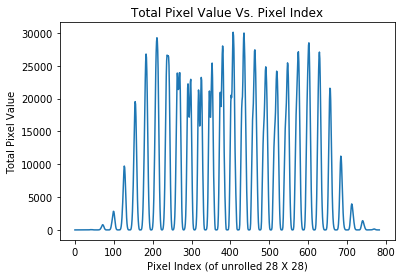

In [217]:
plt.plot(rowSums)
plt.title("Total Pixel Value Vs. Pixel Index")
plt.ylabel("Total Pixel Value")
plt.xlabel("Pixel Index (of unrolled 28 X 28)")
plt.show()

This is a pretty interesting result. We can clearly see what looks like three bell curves. From this, it seems like three regions of space are most active across all images. I expect what we are seeing here is a consequence of the central limit theorem. Let's now compute the average value for each pixel. 

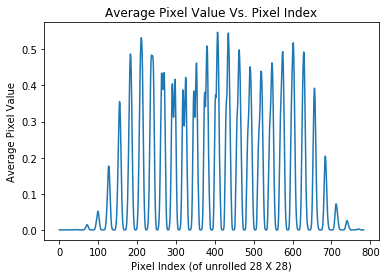

In [216]:
averagePixelValues = rowSums / 55000
plt.plot(averagePixelValues)
plt.title("Average Pixel Value Vs. Pixel Index")
plt.ylabel("Average Pixel Value")
plt.xlabel("Pixel Index (of unrolled 28 X 28)")
plt.show()

As we see, normalising the row sums, computing the average pixel values, doesn't change the shape of the plot, but it does give us pixel values within the valid range of plotting [0,1]. Let's now reshape this average pixel value vector, such that it is 28 x 28 and plot it. 

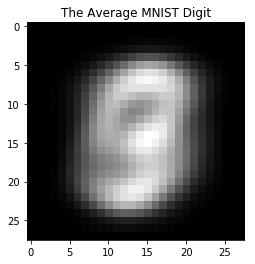

In [219]:
plt.imshow(averagePixelValues.reshape(28,28), cmap='gray')
plt.title("The Average MNIST Digit")
plt.show()

Hmm, what's going on? There are two most interesting observations:
1. I can clearly see a three standing out. 
2. I also see three main regions of white clusters arranged on a virtical line. These three areas correspond to the three bell curve peaks we observed above. These regions represent the most active pixels, or the most intersecting regions across all digits. With this obervation, I posit that these are the regions of least information when it comes to discriminating digits because these three areas represent the most depedence between digits ( these are where the digits have most in common ). 

Note on observation 2: In the probelm of aligning images for training, we could probabbly use this property, where we move images around until we maximize some joint peaks. 

Let us first investigate why a 3 appears. My first thoughts are:
1. We have more threes in our training set.
2. There is a bias in the 3 drawings, where they are drawn more consistently, with less variance, or, in the same vein, there are duplicates of the same 3's. 

Let's first investigate possibility 1. and see how many images of each digit we have in our training data.

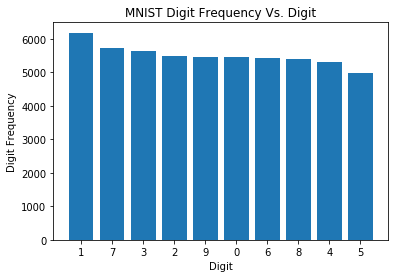

[(1, 6179),
 (7, 5715),
 (3, 5638),
 (2, 5470),
 (9, 5454),
 (0, 5444),
 (6, 5417),
 (8, 5389),
 (4, 5307),
 (5, 4987)]

In [245]:
unique, counts    = np.unique(mnist.train.labels, return_counts=True)
sortedCount       = sorted(dict(zip(unique, counts)).items(), key=lambda x: x[1],reverse=True)
sortedCountLabels = [i[0] for i in sortedCount]
sortedCountFreq   = [i[1] for i in sortedCount]

plt.bar(range(0,10),sortedCountFreq)
plt.xticks(range(0,10),sortedCountLabels)
plt.title("MNIST Digit Frequency Vs. Digit")
plt.ylabel("Digit Frequency")
plt.xlabel("Digit")
plt.show()
sortedCount   

Hmm, the dataset is skewed, but not in the direction of threes. In order to understand why a three is so prominent in the average image, let's do some more experiments that bring out more properties of the data. 

### Question 2: What is the average pixel value of each digit?
In Q1 we saw the average pixel value across all digit classes and saw some interesting results. Now let's look at the average pixel value of within each digit class. 

In [307]:
# TODO: Make more efficient. 
# First we will zip the training labels with the training images
dataWithLabels = zip(mnist.train.labels, mnist.train.images)

# Now let's turn this into a dictionary where subsets of the images in respect 
# to digit class are stored via the corresponding key.

# Init dataDict with keys [0,9] and empty lists.
digitDict = {}
for i in range(0,10):
    digitDict[i] = []

# Assign a list of image vectors to each corresponding digit class index. 
for i in dataWithLabels:
    digitDict[i[0]].append(i[1])

# Convert the lists into numpy matricies. (could be done above, but I claim ignorace)
for i in range(0,10):
    digitDict[i] = np.matrix(digitDict[i])
    print("Digit {0} matrix shape: {1}".format(i,digitDict[i].shape))

Digit 0 matrix shape: (5444, 784)
Digit 1 matrix shape: (6179, 784)
Digit 2 matrix shape: (5470, 784)
Digit 3 matrix shape: (5638, 784)
Digit 4 matrix shape: (5307, 784)
Digit 5 matrix shape: (4987, 784)
Digit 6 matrix shape: (5417, 784)
Digit 7 matrix shape: (5715, 784)
Digit 8 matrix shape: (5389, 784)
Digit 9 matrix shape: (5454, 784)


At this point we have now nicely sliced and diced the original image matrix of all training digits to smaller matricies of each digit. Let's visualize a few examples from each class.

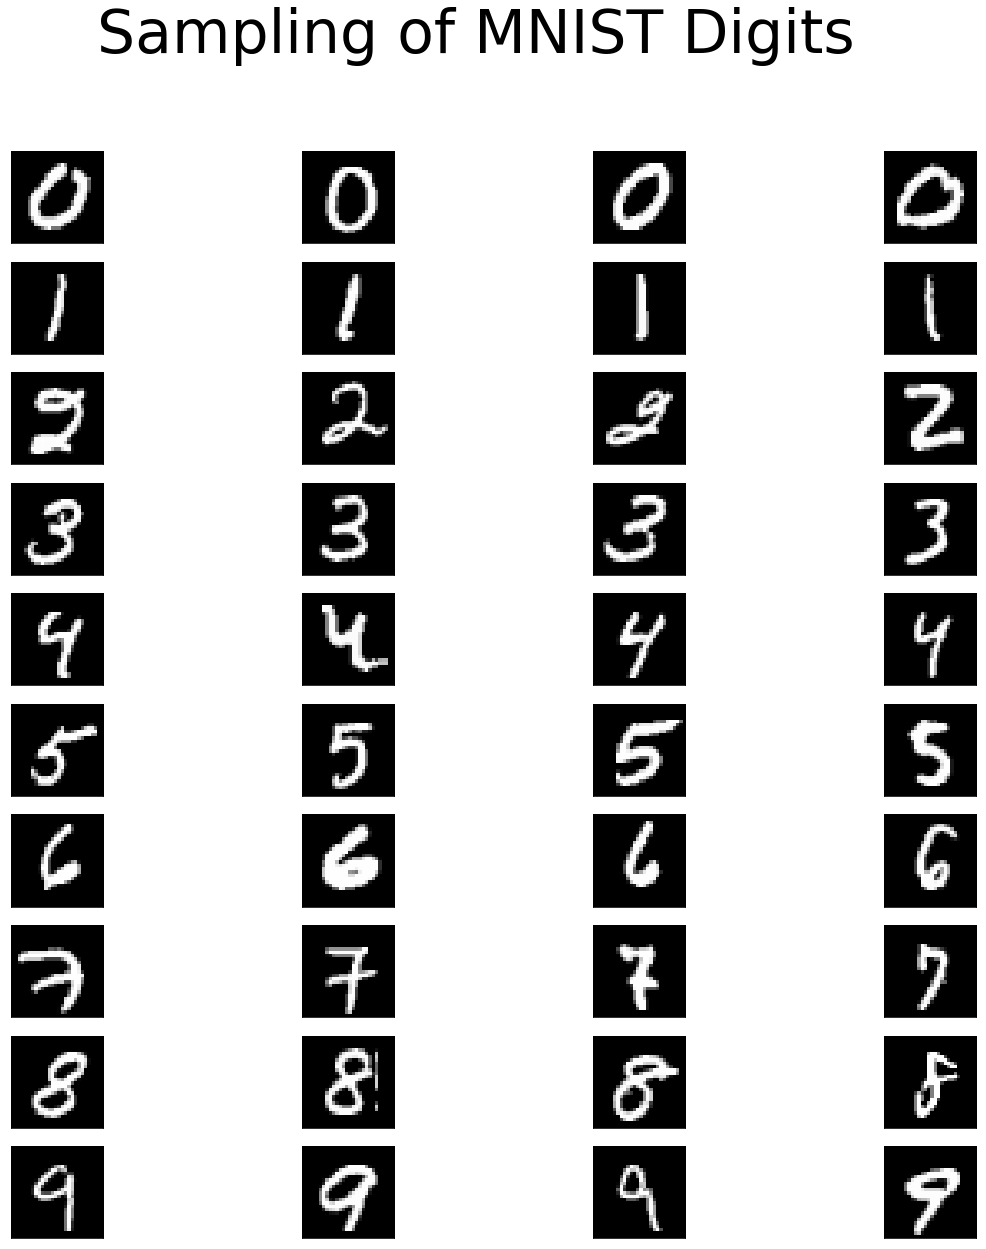

In [386]:
# Some plotting helper functions.
def makeSubplots(nGridRow,nGridCol,figsize=(20,20)):
    sps = []
    fig = plt.figure(figsize=figsize)
    for i in range(1,(nGridRow*nGridCol)+1):
        sps.append(fig.add_subplot(nGridRow,nGridCol,i))
    return (fig,sps)

def turnOffAxes(sps):
    for ax in sps:
        ax.set_xticks([])
        ax.set_yticks([])

# Let's plot some digits. 
figRows,figCols = (10,4)
fig,sps = makeSubplots(figRows,figCols)
turnOffAxes(sps)

# Plots digits as subplots, 4 per row, 10 rows. 
subplotCounter = 0
for digitClass in range(0,10):
    for spi in range(0,4):
        # Grab a single column from the digitClass matrix. 
        sps[subplotCounter].imshow(digitDict[digitClass][spi,:].reshape(28,28),cmap='gray')
        subplotCounter += 1

plt.suptitle('Sampling of MNIST Digits', fontsize=60)
plt.show()

Nice. Now let's keep it simple and compute the average 0. After that, we will generalize the algorithm so that we can plot all the average digits. 

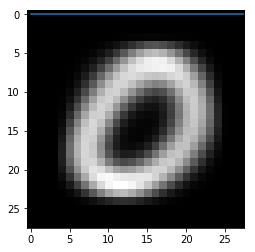

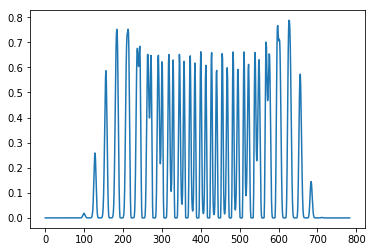

In [393]:
# Computing the average 0. 
nZeroImgs = digitDict[0].shape[0]
avgZero = np.dot(digitDict[0].T, np.ones((nZeroImgs,1)))/nZeroImgs 
plt.imshow(avgZero.reshape(28,28),cmap="gray")
plt.show()
plt.plot(avgZero)
plt.show()

My my my, what do we spy with our little eyes? As we can see, there are two maxima in the zero images ( the most active locations ). Now that we know how to plot the average of a single digit, let's plot the average digits for all classes, along with their plots. 

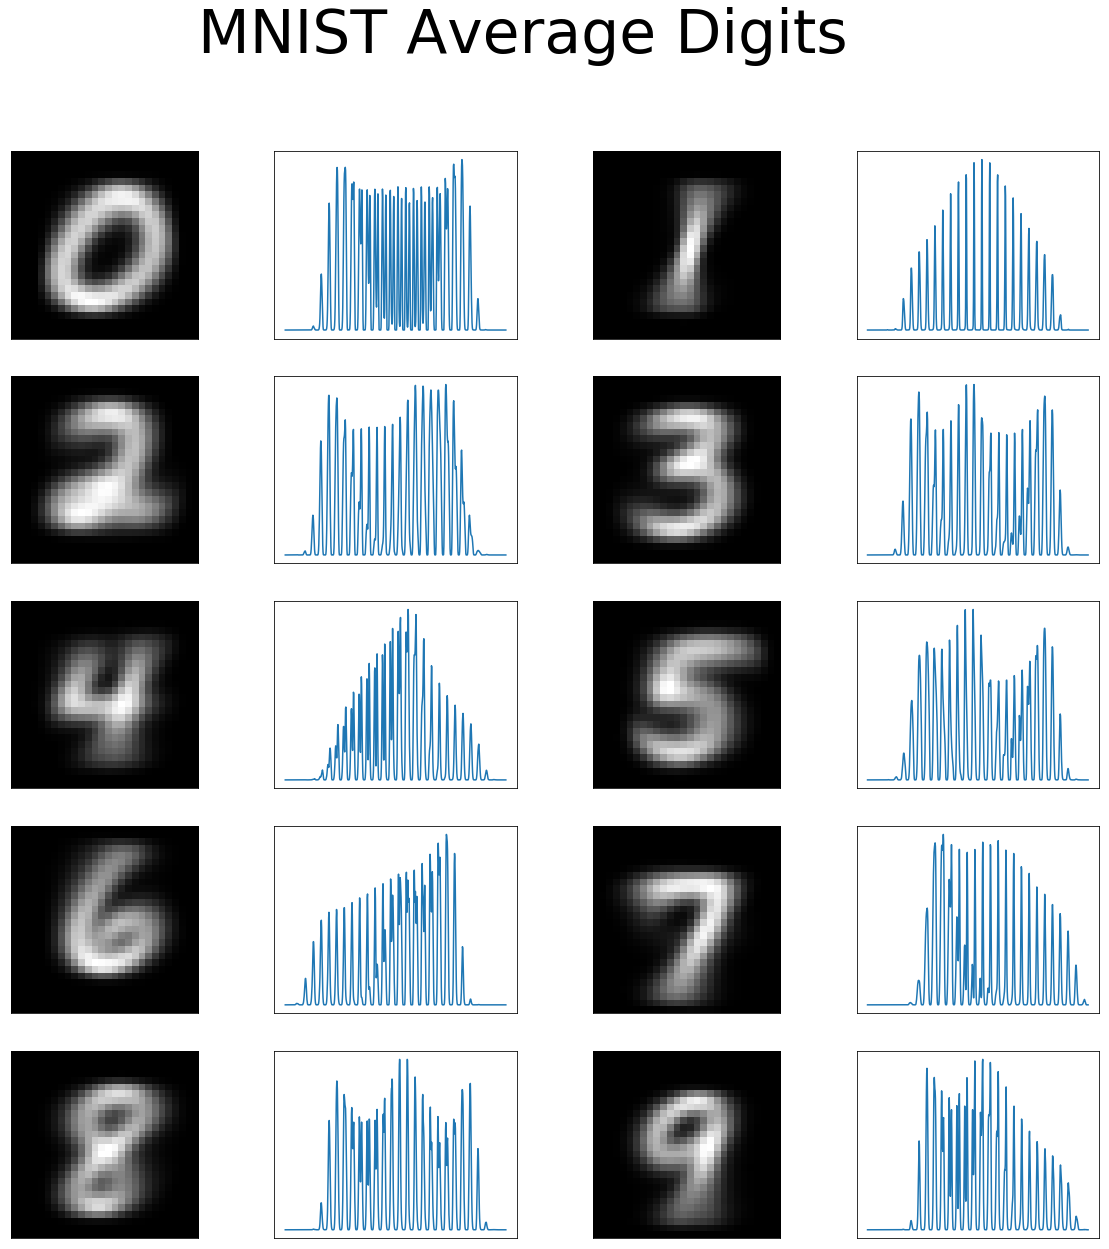

In [410]:
figRows,figCols = (5,4)
fig,sps = makeSubplots(figRows,figCols)
turnOffAxes(sps)

# Plots digits as subplots, 4 per row, 10 rows. 
subplotCounter = 0
for digitClass in range(0,10):
    nImgs = digitDict[digitClass].shape[0]
    avgImg = np.dot(digitDict[digitClass].T, np.ones((nImgs,1)))/nImgs
        # Grab a single column from the digitClass matrix. 
    sps[subplotCounter].imshow(avgImg.reshape(28,28),cmap='gray')
    subplotCounter += 1
    sps[subplotCounter].plot(avgImg)
    subplotCounter += 1
    
plt.suptitle('MNIST Average Digits', fontsize=60)
plt.show()


So what are we seeing here? The images are the average color value for those pixels within that digit class, and the plots are an approximation of the joint probability distribution of all the pixels in a digit. Each column represents the average value that pixel takes on. Each pixel has a probability distribution of its own. In the next notebook we will continue exploring MNIST probabalistically. 

## Next questions and Exploration 

1. Why does the average MNIST digit show a prominent 3? 
2. How do we find outlier digits?
3. Which digit classes have the most variance? What digit was drawn most consistently? 
4. How do we use the joint probability distributions of pixels to classify a digit?
5. Why do the joint probability distributions look the way they do? 
